In [154]:
import re

In [331]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [303]:
df = pd.read_csv("files\PEDE_PASSOS_DATASET_FIAP.csv", sep=";")

In [26]:
df_2022 = df[df["PEDRA_2022"].notna()]
df_2022.rename(columns={"NOME":"NOME_2022"}, inplace=True)
df_2022 = df_2022.filter(like="2022")
df_2022.columns = df_2022.columns.str.replace("_2022","")
df_2022.head()

C:\Users\henriquehashimoto\AppData\Local\Temp\ipykernel_21200\3400191727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.rename(columns={"NOME":"NOME_2022"}, inplace=True)


,NOME,FASE,TURMA,ANO_INGRESSO,BOLSISTA,INDE,CG,CF,CT,PEDRA,...,IPP,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,INDICADO_BOLSA,PONTO_VIRADA,IPV,IAN,NIVEL_IDEAL
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,...,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,...,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


In [23]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 1 to 1348
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOME_2022            862 non-null    object 
 1   FASE_2022            862 non-null    float64
 2   TURMA_2022           862 non-null    object 
 3   ANO_INGRESSO_2022    862 non-null    float64
 4   BOLSISTA_2022        862 non-null    object 
 5   INDE_2022            862 non-null    float64
 6   CG_2022              862 non-null    float64
 7   CF_2022              862 non-null    float64
 8   CT_2022              862 non-null    float64
 9   PEDRA_2022           862 non-null    object 
 10  DESTAQUE_IEG_2022    862 non-null    object 
 11  DESTAQUE_IDA_2022    862 non-null    object 
 12  DESTAQUE_IPV_2022    862 non-null    object 
 13  IAA_2022             862 non-null    float64
 14  IEG_2022             862 non-null    float64
 15  IPS_2022             862 non-null    float64

In [344]:
def separa_anos(df, ano):  
    # Se for 2020, limpar df
    df["FASE_2020"] = df["FASE_TURMA_2020"].str[0]
    df["TURMA_2020"] = df["FASE_TURMA_2020"].str[1]
    
    # #Limpando info errada q foi inputado no df
    df = df[df["FASE_2020"] != 'D']    
        
    # Retirando alunos que não estava no ano escolhido  
    df_ano = df[df[f"PEDRA_{ano}"].notna()]
    
    # Renomeando a coluna de nome para poder manter no df depois
    df_ano.rename(columns={"NOME":f"NOME_{ano}"}, inplace=True)
    
    # Filtrando para deixar apenas as colunas do ano escolhido
    df_ano = df_ano.filter(like=f"{ano}")
    
    # Renomeando as colunas para retirar o ano
    df_ano.columns = df_ano.columns.str.replace(f"_{ano}","")

    #-----------------
    # TRATANDO E CONVERTENDO COLUNAS
    #-----------------
    df_ano["INDE"] = df_ano["INDE"].apply(lambda x: 0 if re.search('[a-zA-Z]', str(x)) else x)     
    df_ano["INDE"] = pd.to_numeric(df_ano["INDE"]) 
    df_ano["INDE"] = df_ano["INDE"].apply(lambda x: x if x <= 10 and x >= 0 else 0)
    
    df_ano["IEG"] = pd.to_numeric(df_ano["IEG"] )
    df_ano["IAN"] = pd.to_numeric(df_ano["IAN"] )
    df_ano["IDA"] = pd.to_numeric(df_ano["IDA"] )
    
    df_ano["IAA"] = pd.to_numeric(df_ano["IAA"] )
    df_ano["IPS"] = pd.to_numeric(df_ano["IPS"] )
    df_ano["IPP"] = pd.to_numeric(df_ano["IPP"] )
    df_ano["IPV"] = pd.to_numeric(df_ano["IPV"] )
    
    df_ano["FASE"] = pd.to_numeric(df_ano["FASE"])
    
    # Rankeando as pedras
    #map_pedras = {"Quartzo":"1 - Quartzo", "Ágata":"2 - Ágata", "Ametista":"3 - Ametista", "Topázio":"4 - Topázio"}
    #df_ano["PEDRA"] = df_ano["PEDRA"].map(map_pedras)
    
    return df_ano


df_ano = separa_anos(df, 2020)
df_ano_anterior = separa_anos(df, 2022-1)
df_ano.head()

C:\Users\henriquehashimoto\AppData\Local\Temp\ipykernel_21200\590128202.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\henriquehashimoto\AppData\Local\Temp\ipykernel_21200\590128202.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,INSTITUICAO_ENSINO_ALUNO,NOME,IDADE_ALUNO,ANOS_PM,FASE_TURMA,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,...,DESTAQUE_IPV,IAA,IEG,IPS,IDA,IPP,IPV,IAN,FASE,TURMA
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Seu destaque em 2020: A sua boa integração aos...,8.50002,8.7,7.500,7.000000,5.9375,7.750000,10.0,2,H
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856390,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.500,5.500000,8.1250,8.111113,10.0,3,H
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.00002,4.1,6.875,0.000000,7.1875,7.750000,5.0,1,D
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8.0,7.500,7.500000,8.4375,8.166665,10.0,2,M
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381391,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333,8.7500,8.944450,10.0,4,L


In [248]:
df_ano_anterior.columns

Index(['NOME', 'FASE', 'TURMA', 'INSTITUICAO_ENSINO_ALUNO',
       'SINALIZADOR_INGRESSANTE', 'PEDRA', 'INDE', 'IAA', 'IEG', 'IPS', 'IDA',
       'IPP', 'REC_EQUIPE_1', 'REC_EQUIPE_2', 'REC_EQUIPE_3', 'REC_EQUIPE_4',
       'PONTO_VIRADA', 'IPV', 'IAN', 'NIVEL_IDEAL', 'DEFASAGEM'],
      dtype='object')

In [277]:
# df_ano["INDE"]
map_fases = {0:"Alpha", 1:"Fase 1", 2:"Fase 2", 3.0:"Fase 3", 4.0:"Fase 4", 5.0:"Fase 5", 6.0:"Fase 6", 7.0:"Fase 7"}

bolsista_aluno = df_ano.query("PEDRA != '#NULO!' ").groupby(by=["FASE","BOLSISTA"])["NOME"].count()
bolsista_aluno = pd.DataFrame(bolsista_aluno)
bolsista_aluno.reset_index(inplace=True)
bolsista_aluno["FASE"] = bolsista_aluno["FASE"].map(map_fases)

bolsista_aluno = bolsista_aluno.pivot_table(index="FASE", columns="BOLSISTA", values="NOME", aggfunc='sum', fill_value=0)
bolsista_aluno.reset_index(inplace=True)
bolsista_aluno["total"] = (bolsista_aluno["Sim"] + bolsista_aluno["Não"])
bolsista_aluno["perc_bolsista"] = round(bolsista_aluno["Sim"] / bolsista_aluno["total"], 4) * 100
bolsista_aluno

BOLSISTA,FASE,Não,Sim,total,perc_bolsista
0,Alpha,188,2,190,1.05
1,Fase 1,185,7,192,3.65
2,Fase 2,146,9,155,5.81
3,Fase 3,125,23,148,15.54
4,Fase 4,49,27,76,35.53
5,Fase 5,36,24,60,40.00
6,Fase 6,7,11,18,61.11
7,Fase 7,18,5,23,21.74


In [285]:
bolsista_aluno.rename(columns={"Sim":"qt_alunos_bolsista", "Não":"qt_alunos_nao_bolsista"}, inplace=True)
bolsista_aluno

BOLSISTA,FASE,qt_alunos_nao_bolsista,qt_alunos_bolsista,total,perc_bolsista
0,Alpha,188,2,190,1.05
1,Fase 1,185,7,192,3.65
2,Fase 2,146,9,155,5.81
3,Fase 3,125,23,148,15.54
4,Fase 4,49,27,76,35.53
5,Fase 5,36,24,60,40.00
6,Fase 6,7,11,18,61.11
7,Fase 7,18,5,23,21.74


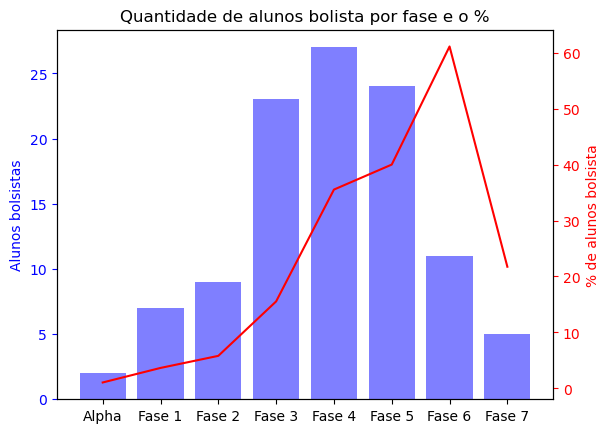

In [281]:
fig, ax1 = plt.subplots()

ax1.bar(bolsista_aluno["FASE"], bolsista_aluno["Sim"], color="blue", alpha=0.5)
ax1.set_ylabe("Alunos bolsistas", color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(bolsta_aluno["FASE"], bolsista_aluno["perc_bolsista"], color='red')
ax2.set_ylabel("% de alunos bolsista", color='red')
ax2.tick_params('y', colors='red')

plt.title("Quantidade de alunos bolista por fase e o %")
plt.show()

In [235]:
# df_ano["INDE"]
fase_inde = df_ano.query("PEDRA != '#NULO!' ").groupby(by="FASE")["INDE"].mean()
fase_inde = pd.DataFrame(fase_inde)
fase_inde.reset_index(inplace=True)

map_fases = {0.0:"Alpha", 1.0:"Fase 1", 2.0:"Fase 2", 3.0:"Fase 3", 4.0:"Fase 4", 5.0:"Fase 5", 6.0:"Fase 6", 7.0:"Fase 7"}

fase_inde["FASE"] = fase_inde["FASE"].map(map_fases)
fase_inde


,FASE,INDE
0,NaN,8.021491
1,NaN,7.422638
2,NaN,7.114310
3,NaN,7.342419
4,NaN,7.078331
5,NaN,6.837677
6,NaN,6.241785
7,NaN,7.288088
8,NaN,7.709168


In [345]:
map_fases = {0.0:"Alpha", 1.0:"Fase 1", 2.0:"Fase 2", 3.0:"Fase 3", 4.0:"Fase 4", 5.0:"Fase 5", 6.0:"Fase 6", 7.0:"Fase 7"}
df_ano["FASE"] = df_ano["FASE"].map(map_fases)

df_ano["FASE"].unique()

array([2, 3, 1, 4, 0, 7, 5, 6, 8], dtype=int64)

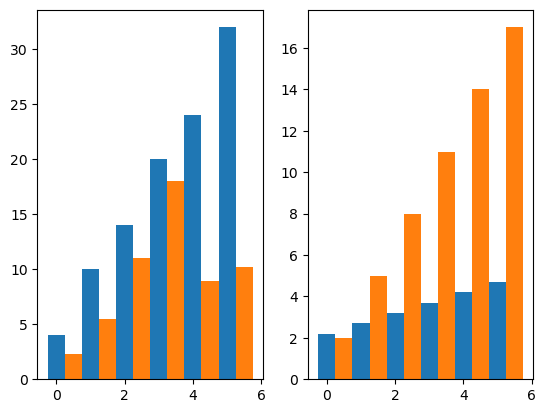

In [338]:
# Library Import(numpy and matplotlib)
import numpy as np 
import matplotlib.pyplot as plot 
 
# Make a data definition
a1 = [2.2, 2.7, 3.2, 3.7, 4.2, 4.7]
b1 = [2, 5, 8, 11, 14, 17]
 
a2 = [4, 10, 14, 20, 24, 32]
b2 = [2.3, 5.5, 11, 18, 8.9, 10.2]
 
r1 = np.arange(6)
width1 = 0.5
 
# Create the first subplot
plot.subplot(1, 2, 2)
plot.bar(r1, a1, width=width1)
plot.bar(r1 + width1, b1, width=width1)
 
# Create the second subplot
plot.subplot(1, 2, 1)
plot.bar(r1, a2, width=width1)
plot.bar(r1 + width1, b2, width=width1)
 
# Display the plot
plot.show()
